In [ ]:
import pandas as pd
import pylab as pl
import numpy as np
import scipy.optimize as opt
from sklearn import preprocessing
%matplotlib inline
import matplotlib.pyplot as plt
import urllib.request as request
import io
from sklearn import preprocessing
from datetime import datetime

# Regressão Logística

O modelo logístico pressupõe que o *logaritmo da razão de chance* de um evento binário é resultado de uma combinação linear de variáveis explicativas (independentes).

Define-se "razão de chance" de um evento (*odds* ou *odds ratio* em Inglês) binário (ou seja, que pode ou não acontecer) como a razão entre a probabilidade do evento acontecer e a probabilidade do evento não acontecer.
Assim, se $p$ é a probabilidade do evento acontecer,

\begin{equation}
\mbox{chance}(p) = \frac{p}{1-p}
\end{equation}

Assim, a hipótese do modelo logistico é:

\begin{equation}
\log_b\left( \frac{p}{1-p}\right) = \Theta ^T X \tag{1}
\end{equation}

onde $X =\left\{x_1, \ldots, x_n\right\}$ é um vetor de variáveis explicativas e $\Theta =\left\{\theta_1, \ldots, \theta_n\right\}$ é vetor com *pesos* a elas atribuído e b é a base dos logaritmos (discutida adiante).

Da equação (1), tira-se:

\begin{equation}
p = h_b(\Theta^T X) = \frac{1}{1+b^{-\Theta^T X}} \tag{2}
\end{equation}


A função $h$ definida em (2) é conhecida como *função logística*.
Nota-se que $1-h(x) = h(-x)$.

## Regressão

Suponha que se tenha um conjunto amostral de $m$ variáveis explicativas $X_i$ e resultados binários $y_i$ (neste caso define-se o valor $1$ para ocorrência e $0$ para a não-ocorrência do evento).

Neste caso, o vetor de pesos $\Theta$ de máxima verossimilhança *sem informação a priori* é dado por:

\begin{equation}
\underset{\Theta}{\mbox{arg max}} \, \prod_i (h_b(\Theta ^T X_i))^{y_i}(h_b(-\Theta ^T X_i))^{1-y_i} \tag{3}
\end{equation}

Note que como $y_i$ vale ou 0 ou 1, cada termo neste produto vale ou $h(\Theta^T X)$ ou $h(-\Theta^T X)$.

O problema de maximização em (3) é consideravelmente mais complexo do que o da regressão linear tradicional.
De todo modo, um problema equivalente, tirando-se o logaritmo na base b do lado esquerdo e multiplicando-se por -1 é:

\begin{equation}
\underset{\Theta}{\mbox{arg min}} \, \sum_i - y_i \log_b h_b(\Theta^T X_i) (1-y_i) \log_B h(-\Theta^T X_i) \tag{4}
\end{equation}

Novamente, note que os termos da soma são ou $\log_b h_B(\Theta^T X)$ (quando o evento acontece) ou $\log_b h_b(-\Theta^T X)$.

A *entropia cruzada* total de uma série aleatória de variáveis binárias $y_i$ em relação a uma sequência de probabilidades  $P=\left\{p_1, \ldots, p_n\right\}$ é definida como:

\begin{equation}
J_P\left[Y\right] = \sum_{y_i=1} - \log_b p_i + \sum_{y_i=0} - \log_b (1-p_i)
\end{equation}

O seu valor médio é naturalmente $J_P\left[Y\right]/n$.

(nota-se que o valor *mínimo* da entropia cruzada é zero e acontece quando $p_i=1$ sempre que $y_i=1$ e $p_i=0$ sempre que $y_i=0$)

O problema da regressão logística como formulado em (4) consiste em minimizar-se a *entropia cruzada* da variável aleatória $y_i$ sob a distribuição $h(\Theta^T X_i)$ definida como:

\begin{equation}
\underset{\Theta}{\mbox{arg min}} \, J_\Theta\left[Y\right] = \sum_{y_i=1}-  \log h_b(\Theta^T X_i) + \sum_{y_i=0}- \log h_b(-\Theta^T X_i) \tag{4}
\end{equation}


Para resolver o problema (4) numericamente, nota-se que:

\begin{equation}
\frac{\partial}{\partial \theta_i} \log_b h_b(\Theta^T X) = h_b(-\Theta^T X)x_i = \left( 1-h_b(\Theta^T X_i)\right)x_i
\end{equation}

Assim,
\begin{equation}
\frac{\partial}{\partial \theta_i} J = \sum_{y_i=1} x_i\left(h_b(\Theta^T X_i)-1\right) + \sum_{y_i=0} x_i h_b(-\Theta^T X_i)\end{equation}

que é o o mesmo que
\begin{equation}
\frac{\partial}{\partial \theta_i} J = \sum_{i} x_i\left(h_b(\Theta^T X_i)-y_i\right)
\end{equation}

Finalmente, a base do logaritmo é arbitrária e define a unidade de informação medida.

Se a base for 2, a informação é medida em *bits* (ou *Shannons*).
Se a base for *e*, a base natural, diz- que a unidade é *nat*.
Finalmente, para a base 10 a informação é medida em *dígitos* (ou *Hartleys*).

Nota-se pela definição em (5), se a base é 2, vale a propriedade de que $J_\Theta[Y] + J_{-\Theta}[Y] = 2n$.
Assim, se $\Theta=0$, a entropia cruzada é exatamente 1 bit por ponto da amostra.

Para classificadores binários, esse é o *pior* resultado possível.
De fato, suponha que exista um vetor $\Theta^*$ para o qual a entropia cruzada de uma variável $Y$ seja *maior* do que 1 bit por variável.
Então o classificador logístico com vetor $-\Theta$ produz uma entropia cruzada *menor* do que 1 bit por variável.

# Exercício 1: Regressão linear com valores sintéticos

Uma variável binária valendo 0 ou 1 é sorteada sobre os pontos no plano $x,y$ com probabilidade dada por:

\begin{equation}
p(z=1:x,y) = \frac{1}{1+e^{-(x+0.5y-6)}}
\end{equation}

A variável ```z``` definida abaixo contém uma amostra de 1000 pontos desta variável no retângulo em $x \in [0,10], \, y \in [0,10]$


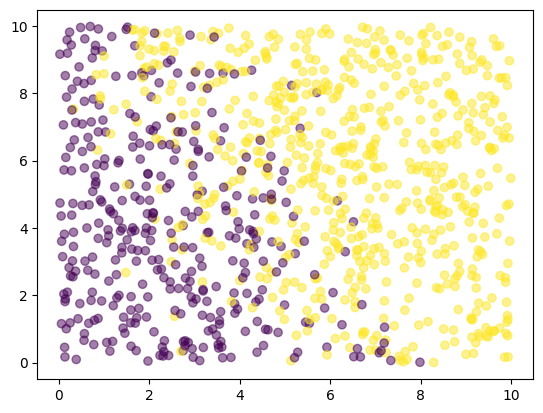

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

x = np.random.uniform(0, 10, size=1000)
y = np.random.uniform(0, 10, size=1000)
linear = x+0.5*y-6
p = 1/(1+np.exp(-linear))
z = np.random.binomial(n=1, p=p)
plt.scatter(x,y,c=z, alpha=0.5)

## a) Regressão logística dos dados

Use o modelo de regressão logística da biblioteca sklearn para fazer a regressão logística dos dados.

In [ ]:
from sklearn.linear_model import LogisticRegression

A função ```LogisticRegression().fit(independentes, res)``` faz a regressão logística entre as variáveis independentes em ```independentes``` com o vetor de resultados em ```res```.

Note que ```independentes``` é uma matriz $n\times m$ onde $n$ é a quantidade de pontos e $m$ o número de variáveis independentes.

A função retorna um objeto do tipo ```LogisticRegression``` que modela a probabilidade do evento como
\begin{equation}
P(y:x_1, \ldots, x_n) = \frac{1}{1+e^{- w_0 - \sum_i w_i x_i}}
\end{equation}

onde $w_1, \ldots, w_n$ são os pesos de cada variável independente e $w_0$ é o termo *de interceptação*.
 O vetor com os pesos de cada variável está no atributo ```coef_``` e o termo de interceptação  está no atributo ```intercept_```.

Use a função ```LogisticRegression().fit(independentes, res)``` para prever a variávez ```z``` em termos das variáveis ```x``` e ```y``` definidas acima.
Mostre os coeficientes em ```x```, ```y``` e o termo de interceptação.
 Compare com os valores 1, 0,5 e -6.

In [ ]:
# Complete com seu código

## b) Prevendo resultados

O modelo gerado no item a) pode prever o valor do resultado dado um conjunto de variáveis independentes.

O método ```model.predict(independentes)``` faz a previsão.
O parâmetro ```independentes``` é uma matriz cujas linhas são os pontos no espaço das variáveis independentes sobre os quais se fazer a previsão.

Repita a plotagem do enunciado mas substitua a variável ```z``` no parâmetro ```c``` pela previsão do modelo.

Compare a figura com a do enunciado.

In [ ]:
# Complete com seu código

## c) Cálculo de probabilidades

O método ```model.predict_proba(independentes)``` calcula um vetor de probabilidades para cada possível valor da variável prevista.

Use este método para calcular as probabilidades de cada resultado em (0,0), (6,0) e (10,0).

In [ ]:
# Complete com seu código

### d) Matriz de confusão

Usando novamente os pontos x, y do enunciado, motre a matriz de confusão da previsão com os valores de verdadeiros positivos, falsos positivos, verdadeiros negativos e falsos negativos.

Motre os valores de sensibilidade (verdadeiros positivos/positivos), especificidade (verdadeiros negativos/negativos) e precisão (verdadeiros positivos/previstos positivos) para o preditor.

*Atenção*: Você deve aqui calcular os valores de verdadeiro positivo, falso positivo, verdadeiro negativo e falso negativo "na mão", ou seja, com 4 acumuladores e inspecionando valores de ```z``` e os correspondentes valores retornados por ```model.predict(independentes)```.
No próximo item usaremos uma função da biblioteca pronta para isso.


In [ ]:
# Complete com seu código

### e) Matriz de confusão por ```sklearn```

A biblioteca ```sklearn``` tem um pacote chamado ```metrics```  com diversas métricas de desempenho de classificadores.

Em particular, ela tem a função ```confusion_matrix``` que calcula a matriz de confusão dada uma série de valores reais e as correspondentes previsões.
O seu primeiro parâmetro é a série com valores reais, o segundo é a série com valores previstos.

Por exemplo, suponha que uma série de dados contenha os valores $[1, 1, 1, 0, 0, 0, 1, 1]$ e um classificador previu a série $[0, 1, 1, 0, 0, 1, 1, 0]$

A correspondente matriz de confusão é:
\begin{equation}
\left[\begin{array}{cc} 2 & 1 \\
2 & 3\end{array}\right]
\end{equation}

O código abaixo demostra este cálculo com ```confusion_matrix```.

In [ ]:
from sklearn import metrics
reais =     [1, 1, 1, 0, 0, 0, 1, 1]
previstos = [0, 1, 1, 0, 0, 1, 1, 0]
print(metrics.confusion_matrix(reais, previstos))

Repita o cálculo do exercício anterior com ```confusion_matrix```.
Compare os seus resultados.

In [ ]:
# Complete com seu código

# Exercício 2: Regressão Logística multinomial

A regressão logística multinomial extende o princípio da regressão logística para casos em que a variável dependente pode assumir mais do que somente dois valores (mas ainda assim um conjunto discreto de valores).

O exemplo a seguir mostra 3 conjuntos distintos de pontos, um centrado em (0,0), um centrado em (2,0) e um centrado em (1,1).
A cada um é atribuído um rótulo distinto em (0,1,2).

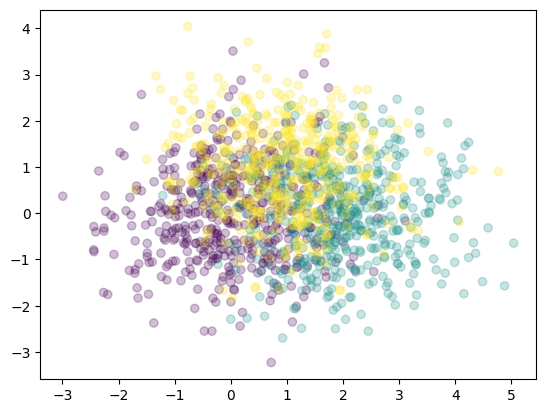

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
x1 = np.random.normal(0, 1, size=500)
y1 = np.random.normal(0, 1, size=500)
z1 = np.full(500,0)
x2 = np.random.normal(2, 1, size=500)
y2 = np.random.normal(0, 1, size=500)
z2 = np.full(500,1)
x3 = np.random.normal(1, 1, size=500)
y3 = np.random.normal(1, 1, size=500)
z3 = np.full(500,2)
xtotal = np.concatenate((x1,x2,x3))
ytotal = np.concatenate((y1,y2,y3))
ztotal = np.concatenate((z1,z2,z3))
plt.scatter(xtotal,ytotal,c=ztotal, alpha=0.25)
plt.show()

A função ```LogisticRegression().fit(independentes, res)``` também pode fazer a regressão multinomial.

Há dois tipos distintos de regressão multinomial.
Estamos aqui interessados na regressão do tipo "um versus todos", que consiste em criar múltiplas regressões lineares para cada possível valor de variável dependente.

A previsão é feita selecionando-se o valor mais provável em cada ponto.

Selecione a regressão "um versus todos" com o parâmetro  ```LogisticRegression(multi_class='ovr').fit(independentes, res)```.

Faça a aproximação dos pontos por uma regressão multinomial e repita a plotagem do enunciado usando para cores os valores *previstos* de z.

In [ ]:
# Complete com seu código

# Exercício 3: Prevendo Rotatividade (churn) de clientes

Adaptado do material disponibilizado por Saeed Aghabozorgi.
<p>Copyright &copy; 2018 <a href="https://cocl.us/DX0108EN_CC">Cognitive Class</a>. This notebook and its source code are released under the terms of the <a href="https://bigdatauniversity.com/mit-license/">MIT License</a>.</p>

O _Telco Churn_ é um arquivo de dados hipotéticos que diz respeito aos esforços de uma empresa de telecomunicações para reduzir o volume de negócios perdidos em sua base de clientes. Cada caso corresponde a um cliente separado e registra várias informações demográficas e de uso do serviço.
A seguinte célula recupera os dados do _Telco Churn_ e coloca-os em um DataFrame.



In [ ]:
churn_df = pd.read_csv(io.TextIOWrapper(request.urlopen("https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/ChurnData.csv")))
churn_df.head()

,tenure,age,address,income,ed,employ,equip,callcard,wireless,longmon,...,pager,internet,callwait,confer,ebill,loglong,logtoll,lninc,custcat,churn
0,11.0,33.0,7.0,136.0,5.0,5.0,0.0,1.0,1.0,4.40,...,1.0,0.0,1.0,1.0,0.0,1.482,3.033,4.913,4.0,1.0
1,33.0,33.0,12.0,33.0,2.0,0.0,0.0,0.0,0.0,9.45,...,0.0,0.0,0.0,0.0,0.0,2.246,3.240,3.497,1.0,1.0
2,23.0,30.0,9.0,30.0,1.0,2.0,0.0,0.0,0.0,6.30,...,0.0,0.0,0.0,1.0,0.0,1.841,3.240,3.401,3.0,0.0
3,38.0,35.0,5.0,76.0,2.0,10.0,1.0,1.0,1.0,6.05,...,1.0,1.0,1.0,1.0,1.0,1.800,3.807,4.331,4.0,0.0
4,7.0,35.0,14.0,80.0,2.0,15.0,0.0,1.0,0.0,7.10,...,0.0,0.0,1.0,1.0,0.0,1.960,3.091,4.382,3.0,0.0


## Entendendo os dados
Usaremos um conjunto de dados de telecomunicações para prever a rotatividade de clientes. Este é um conjunto de dados histórico do cliente em que cada linha representa um cliente. Os dados são relativamente fáceis de entender e você pode descobrir insights que você pode usar imediatamente. Normalmente, é mais barato manter os clientes do que adquirir novos, portanto, o foco dessa análise é prever os clientes que permanecerão na empresa.

Esse conjunto de dados fornece informações para ajudá-lo a prever o comportamento que ajudará você a manter os clientes. Você pode analisar todos os dados relevantes do cliente e desenvolver programas de retenção de clientes.

O conjunto de dados inclui informações sobre:

- Clientes que saíram no último mês - a coluna chama-se Churn
- Serviços para os quais cada cliente se inscreveu - telefone, várias linhas, internet, segurança on-line, backup on-line, proteção de dispositivos, suporte técnico e transmissão de TV e filmes
- Informações da conta do cliente - por quanto tempo eles foram cliente, contrato, forma de pagamento, faturamento digital, cobranças mensais e cobranças totais
- Informações demográficas sobre clientes - sexo, faixa etária e se eles têm parceiros e dependentes.


Vamos selecionar alguns dados para modelagem:

In [ ]:
valores_explicativos = np.asarray(churn_df[['tenure', 'age', 'address', 'income', 'ed', 'employ', 'equip']])
churn_real = np.asarray(churn_df['churn'], dtype=int)

Note que a variável ```churn_real``` é forçada a adotar valores inteiros.
Isso é uma necessidade do objeto ```LinearRegression```.

Ademais, vamos normalizar as variáveis independentes:

In [ ]:
from sklearn import preprocessing
normalizados = preprocessing.StandardScaler().fit(valores_explicativos).transform(valores_explicativos)

Finalmente, vamos dividir o conjunto de dados aleatoriamente em dois subconjuntos, um de treinamento e um de testes.
Vamos usar 80% dos dados para treinamento e 20% para testes.

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(normalizados, churn_real, test_size=0.2)

## a) Crie um modelo de regressão Logística para os dados de treinamento

Use as variáveis ```X_train``` como as variáveis independentes e as variáveis ```y_train``` como variáveis dependentes.

Mostre o valor dos coeficientes de cada parâmetro independente e do coeficiente de interceptação.

In [ ]:
# Complete com seu código

## b) Mostre a matriz de confusão do modelo gerado no item a) usando os valores de teste.

Compare os resultados previstos para ```x_test``` com os esperados em ```y_test```.
Mostre a matriz de confusão.
Calcule os valores de sensibilidade, especificidade e precisão.
Você pode fazer o cálculo "na mão" ou usar ```confusion_matrix```.

In [ ]:
# Complete com seu código

## c) Mudando o "valor de corte".

Talvez você tenha obtido um valor de sensibilidade limitado.
A razão é que o modelo é muito reticente em indicar uma previsão de churn, evidenciada pela alta quantidade de falsos negativos.

O modelo prevê Churn sempre que a probabilidade ultrapassa 50%.
Podemos modificar o valor de corte de forma a tornar o modelo mais sensível reduzindo este valor.

Construa agora a matriz de confusão do modelo usando como valor de corte 30%.
Para tanto use o método ```predict_proba``` para se obter as probabilidades usando um conjunto de dados explicativos em ```X_test```.
A primeira coluna é a probabilidade do dado ser classificiado como negativo, a segunda é a probabilidade de ser classificado como positivo.
Conte como "previsto verdadeiro" todo dado para o qual a segunda coluna está acima de 0,3.

Mostre a matriz de confusão.
Quais são os novos valores de sensibilidade, especificidade e precisão?

In [ ]:
# Complete com seu código

*Atenção*: Você talvez esteja mais satisfeito com este valor de parâmetro. parâmetro.
Neste momento, seria necessário um novo processo de validação para confirmar o melhor desempenho do classificador, e este processo deve ser feito com dados novos.
Infelizmente esgotamos os dados disponíveis!
Mais adiante, veremos um processo chamado *validação cruzada* que nos permitirá explorar estes parâmetros (chamados de hiperparâmetros) sem esgotar o conjunto de dados para validação.

## d) Curva ROC

De todo modo, o ganho em Sensibilidade (taxa de verdadeiros postivos) no item anterior ocorre muito provavelmente às custas de uma perda em Especificidade (taxa de verdadeiros negativos).
O problema de se determinar se este novo valor de corte é melhor ou não é complexo, e depende dos custos de falsos positivos e falsos negativos.

É possível avaliar um classificador binário ao longo de *todos* os possíveis valores de corte.
A ferramenta para isso é a curva ROC (*Receiver Operating Characteristic*) que mostra a taxa de verdadeiros positivos no eixo y e a taxa de falsos positivos no eixo x.
Para entender a curva, suponha que o valor de corte seja inicialmente 100% (supondo a nota como uma probabilidade).
Neste caso, nenhuma entrada seria considerada positiva, teríamos uma taxa de zero tanto em falsos positivos quanto em verdadeiros positivos.
A medida que o valor de corte cai a zero, ambas as estatísticas se aproximam de 100%.
Idealmente, a taxa de verdadeiros positivos cresce *mais rápido* que a taxa de falsos positivos, e a curva ROC se mantém acima da curva diagonal $y=x$.



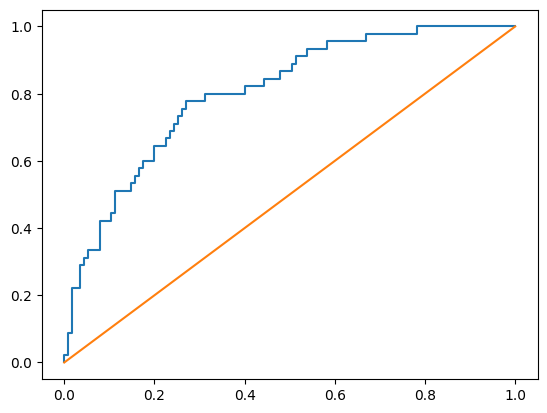

Exemplo de curva ROC

Associada à curva ROC está a métrica *área sob a curva*.
A área sob a curva ROC indica o quão bom é um classificador.
Um classificador binário *jamais* deve ter uma área sob a curva menor que 0.5, afinal, neste caso um classificador que tomasse a medida *oposta* teria desempenho melhor que o classificador original.

O pacote ```metrics``` possui uma função para criar a curva ROC a partir de valores reais de variáveis previstas e as correspondentes notas dadas por um classificador.
A função é ```metrics.roc_curve```, o seu primeiro parâmetro é uma sequência de valores reais de variáveis e o segundo é uma sequência de notas dadas por um classificador.
A função retorna uma tupla com 3 componentes, uma sequência de taxas de falso positivo, uma sequência de taxas de verdadeiro positivo e uma sequência de valores de corte.

metrics.roc_auc_score(y_train, modelo_churn.predict_proba(X_train)[:,1])
A função ```metrics.roc_auc_socore``` calcula a métrica "área sob a curva".
Os seus dois parâmetros são os mesmos da função ```metrics.roc_curve```.
Ela retorna a área sob a curva ROC.

Use estas funções para plotar a curva ROC e calcular a área sob a curva

In [ ]:
# Complete com seu código

# Exercício 4: Criando um *ranking* de competidores a partir de resultados 1x1.

## a) Resultados dos pontos corridos do Campoeonato Brasileiro

O arquivo em [http://www.lsc.poli.usp.br/pece_ai/campeonato-brasileiro-full.csv](http://www.lsc.poli.usp.br/pece_ai/campeonato-brasileiro-full.csv) contém todos os resultados do Campeonato Brasileiro da série A de 2003 a 2023.

Estes dados são compilados por Adão L. Duque em [https://github.com/adaoduque/Brasileirao_Dataset](https://github.com/adaoduque/Brasileirao_Dataset).

A linha abaixo carrega o arquivo em um DataFrame Pandas chamado ```jogos_campeonato_brasileiro```.
Cada time é identificado por três letras.
A lista completa de times está na variável ```times```.
O dicionário ```time_indice``` contém uma tabela com o índice de cada time na variável ```times```.

In [ ]:
jogos_campeonato_brasileiro=pd.read_csv(io.TextIOWrapper(request.urlopen("http://www.lsc.poli.usp.br/pece_ai/campeonato-brasileiro-full.csv")))
times = jogos_campeonato_brasileiro['mandante'].unique()
time_indice = {}
for i, x in enumerate(times):
  time_indice[x] = i
jogos_campeonato_brasileiro['datahora'] = jogos_campeonato_brasileiro['data'].add(jogos_campeonato_brasileiro['hora']).apply(lambda s : pd.to_datetime(datetime.strptime(s, "%d/%m/%Y%H:%M")))
jogos_campeonato_brasileiro['res'] = jogos_campeonato_brasileiro['mandante_Placar'].combine(jogos_campeonato_brasileiro['visitante_Placar'], lambda m, v: 1 if m > v else (0 if m==v else -1 ))
jogos_campeonato_brasileiro.sort_values('datahora', ascending = True, kind='stable')
jogos_campeonato_brasileiro.head()

,ID,rodata,data,hora,mandante,visitante,formacao_mandante,formacao_visitante,tecnico_mandante,tecnico_visitante,vencedor,arena,mandante_Placar,visitante_Placar,mandante_Estado,visitante_Estado,datahora,res
0,1,1,29/03/2003,16:00,Guarani,Vasco,NaN,NaN,NaN,NaN,Guarani,Brinco de Ouro,4,2,SP,RJ,2003-03-29 16:00:00,1
1,2,1,29/03/2003,16:00,Athletico-PR,Gremio,NaN,NaN,NaN,NaN,Athletico-PR,Arena da Baixada,2,0,PR,RS,2003-03-29 16:00:00,1
2,3,1,30/03/2003,16:00,Flamengo,Coritiba,NaN,NaN,NaN,NaN,-,Maracanã,1,1,RJ,PR,2003-03-30 16:00:00,0
3,4,1,30/03/2003,16:00,Goias,Paysandu,NaN,NaN,NaN,NaN,-,Serra Dourada,2,2,GO,PA,2003-03-30 16:00:00,0
4,5,1,30/03/2003,16:00,Internacional,Ponte Preta,NaN,NaN,NaN,NaN,-,Beira Rio,1,1,RS,SP,2003-03-30 16:00:00,0


A coluna ```res``` contém uma variável com 1 se o mandante do jogo ganhou, 0 se empatou e -1 se perdeu.

Suponha que o resultado seja explicado por uma variável independente da forma $X = \{x_1, \ldots, x_n\}$ com n igual ao total de times.
Nesta variável, para um determinado jogo, $x_i=1$ se o $i$-gésimo time jogou como mandante, $x_i=-1$ se o $i$-gésimo time jogou como visitante e 0 se não jogou.

Naturalmente, para todos os pontos, tem-se somente um coeficiente com 1, somente um coeficiente com -1 e o restante zero.

A função ```cria_vetor_x``` gera um vetor deste tipo dada uma linha de um jogo.

In [ ]:
def cria_vetor_x(linha):
  x = np.zeros(len(times))
  x[time_indice[linha["mandante"]]]=1
  x[time_indice[linha["visitante"]]]=-1
  return x

Exemplo: Eis o vetor x correspondente ao jogo em que o Atlético Mineiro recebeu o Fluminense em 2015:

In [ ]:
print(jogos_campeonato_brasileiro.iloc[5000])
print(cria_vetor_x(jogos_campeonato_brasileiro.iloc[5000]))

Crie um modelo multinomial de regressão logística para prever o resultado entre dois times.

Use este modelo para prever o resultado de um jogo em que o Palmeiras (```PAL```) recebe o Corinthians (```COR```).
Faça uma regressão multinomial do tipo "um-contra-todos".

In [ ]:
# Complete com seu código

## b) Criando um Ranking de times com pontuação

Suponha por hora que o resultado de um jogo pode ser somente vitória do mandante ou vitória do visitante (vamos ignorar o empate).

Suponha que a probabilidade do time mandante vencer é modelada por:

\begin{equation}
p = \frac{1}{1+e^{-(w_0 + w_m -w_v)}}
\end{equation}

onde $w_m$ é a *pontuação* do time mandante e $w_v$, a *pontuação* do time visitante e $w_0$ é uma constante relacionada com a vantagem inerente do time mandante, qualquer que seja.

Em um cenário no qual não há empates, é possível obter esta pontuação fazendo-se a regressão logística do resultado "vitória do mandante" usando a mesma convenção do item a).

Um empate pode ser visto como a *sobreposição de dois resultados*: vitória do mandante e vitória do visitante. É possível assim aplicar este modelo a resultados com empate.
Há somente um problema com essa abordagem: Como cada empate produz dois resultados, os empates ficam super-representados no modelo.
É possível no entanto atribuir *pesos* às amostras na regressão logística.
Por exemplo, para o objeto ```LogisticRegression``` da biblioteca skalearn, o modelo é criado com ```LogisticRegression().fit(independentes, res, pesos)```, onde ```pesos``` é o peso de cada entrada.

Crie uma pontuação para todos os times que participaram no Campeonato Brasileiro.

Para tanto crie 3 vetores, ```X```, ```y```, e ```pesos```.

Para cada resultado com vitória em ```jogos_campeonato_brasileiro```, adicione uma entrada em ```X``` com o vetor dos participantes, seguindo a mesma convenção do item a), uma entrada em ```y``` com 1 se o mandante ganhou, 0 se o mandante perdeu e uma entrada em ```pesos``` com 1.

Para cada resultado com empate, adicione *duas* entradas em ```X``` com o vetor dos participantes (duplicado), *duas* entradas em ```y``` com 1 e 0 e *duas* entradas em ```pesos``` com 0.5.

Faça a regressão logística com os dados e obtenha o coeficiente de cada time.
Mostre os times na ordem decrescente de coeficiente.

In [ ]:
# Complete com seu código

### c) Considerando variações ao longo do tempo: O modelo ELO

A tabela do resultado anterior talvez tenha sido intrigante.
O desempenho atual de alguns times talvez não corresponda às suas glórias que vêm do passado.

Sabe-se que times de futebol têm desempenho notoriamente variável ao longo dos anos.

Uma solução para capturar essa variação é usar um processo *contínuo* de Gradientes Conjugados Estocástico para estimar o vetor $X$ de notas.

Neste processo, *cada partida* causa uma pequena modificação nas notas dos times que nela participaram.
Esta modificação é de uma constante $\alpha$ vezes a derivada da função objetivo, a entropia cruzada, (definida acima) em função de cada um dos coeficientes.
A constante $\alpha$ no contexto de aprendizagem de máquina é chamada frequentemente de *taxa de aprendizado*.

Lembramos que o gradiente da função entropia cruzada é

\begin{equation}
\frac{\partial}{\partial \theta_i} J = \sum_{i} x_i\left(h_b(\Theta^T X_i)-y_i\right)
\end{equation}

Vamos usar aqui $y_i=1$ em caso de vitória do mandante e $y_i=0$ em caso de vitória do visitante.
Novamente, em casos de empate, vamos supor a existência de duas "meias partidas", uma com vitória do mandante, outra com vitória do visitante (neste caso usaremos metade da taxa de aprendizado).


Seja $N_i$ a estimativa para o vetor de notas e $a_i$ a estimativa para a "vantagem do mandante".
Consideremos uma única partida na qual o time de índice $m$ (mandante) recebe o time $v$ (visitante).
Neste caso a nota do mandante é ${N_ m}_i$ e a nota do visitante é ${N_v}_i$.
Seja a previsão para a probabilidade de vitória do mandante $p_i$.
Então podemos ajustar o vetor de notas de acordo com o gradiente da função entropia cruzada.

Caso haja vitória do mandante, a atualização deve ser:

\begin{align*}
{N_m}_{i+1} &= {N_m}_{i} + \alpha(1-p_i)\\
{N_v}_{i+1} &= {N_v}_{i} - \alpha(1-p_i)\\
a_{i+1} &= a_i + \alpha(1-p_i)
\end{align*}

Caso haja vitória do visitante, a atualização deve ser:

\begin{align*}
{N_m}_{i+1} &= {N_m}_{i} - \alpha p_i\\
{N_v}_{i+1} &= {N_v}_{i} + \alpha p_i\\
a_{i+1} &= a_i - \alpha p_i
\end{align*}

Finalmente, em caso de empate, há uma combinação dos dois:

\begin{align*}
{N_m}_{i+1} &= {N_m}_{i} + \alpha(1/2 - p_i)\\
{N_v}_{i+1} &= {N_v}_{i} + \alpha(1/2 - p_i)\\
a_{i+1} &= a_i - \alpha(1/2 - p_i)
\end{align*}


Algumas observações:
* Tentamos atualizar também a estimativa para a ¨vantagem do mandante¨ a cada resultado.
* Um resultado  "esperado" causa uma pequena modificação nas notas. Por exemoplo, se a vitória do madante era esperada, $p_i$ é próximo de 1.
Se ela realmente ocorre, as modificações, todas proporcionais a $(1-p)$, são pequenas.
Do mesmo modo, um resultado "inesperado" causa uma grande modificação nas notas.
* O empate *não* é neutro! A menos que $p_i$ seja exatamente $1/2$, ocorrerá alguma modificação nas notas.

Este é o famoso modelo ELO, usado para criar *rankings* de atletas e equipes a partir de resultados individuais.

Implemente o modelo ELO para os times do campeonato Brasileiro completando o código abaixo.

Este código cria uma matriz ```notas_hist``` com uma coluna para cada time. Cada coluna é uma série histórica de notas.
Também é criado um vetor de datas com o dia e hora em que aconteceu cada jogo.

Você deve completar o código que atualiza o vetor ```notas``` com a nota de cada time, de acordo com as regras acima.
Note que o índice do time mandante é ```m```, o índice do time visitante é ```v``` e a probabilidade de vitória do mandante é ```p```.
Você também deve atualizar a "vantagem do mandante" na variável ```a```.

A taxa de aprendizagem $\alpha$ está definida como $0,05$.
Experimente modificá-la.


In [ ]:
# Calcula a probabilidade de vitória do mandante
#  de acordo com um vetor que descreve o jogo, um
#  vetor de notas e uma vantagem de mandante
def probabilidade_vitoria_mandante(vetor, notas, vantagem):
  return 1/(1+np.exp((-vetor.dot(notas)) - vantagem))

notas_inicial = np.zeros(len(times))
vantagem_inicial = 0.5
# Vetor de notas do time
notas = np.array(notas_inicial)
# Vantagem do mandante
a = vantagem_inicial
datas = []
notas_hist = []
alpha = 0.05
beta = 1.0
for i in range(len(jogos_campeonato_brasileiro)):
  linha = jogos_campeonato_brasileiro.iloc[i]
  datas.append(linha["datahora"])
  notas_hist.append(np.array(notas))
  vec = cria_vetor_x(linha)
  # Calcula a probabilidade de vitória do mandante para este jogo
  p = probabilidade_vitoria_mandante(vec, notas, vantagem)
  res = linha['res']
  # Índice do mandante
  m = time_indice[linha["mandante"]]
  # Índice do vistante
  v = time_indice[linha["visitante"]]
  if res==1: # Vitoria mandante
    # Complete com seu código:
      # Atualize o vetor notas e a variável vantagem
      # em caso de vitória do mandante
  elif res==-1: # Vitoria vistante
    # Complete com seu código:
      # Atualize o vetor notas e a variável vantagem
      # em caso de vitória do visitante
  else: # Empate
    # Complete com seu código:
      # Atualize o vetor notas e a variável vantagem
      # em caso de empate
notas_hist = np.array(notas_hist).T

O código abaixo plota o histórico de notas do "trio de ferro" Paulistano usando a matriz ```notas_hist``` e o vetor ```datas```:

In [ ]:
plt.plot(datas, notas_hist[time_indice["Sao Paulo"]], label = "São Paulo")
plt.plot(datas, notas_hist[time_indice["Palmeiras"]], label = "Palmeiras")
plt.plot(datas, notas_hist[time_indice["Corinthians"]], label = "Corinthians")
plt.legend()

### d) Use o vetor ```notas``` para mostrar o *ranking* dos times do campeonato Brasileiro ao final de 2023.

In [ ]:
# Complete com seu código